In [445]:
import pathlib
import random
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
from networkx.algorithms.approximation import average_clustering

### Leer el archivo y crear el grafo

In [446]:
G = nx.read_edgelist("facebook_combined.txt")

In [447]:
print(len(G.nodes()))

4039


In [448]:
print(len(G.edges()))

88234


In [449]:
cc = max(nx.connected_components(G), key=len)
G.remove_nodes_from(set(G)-cc)

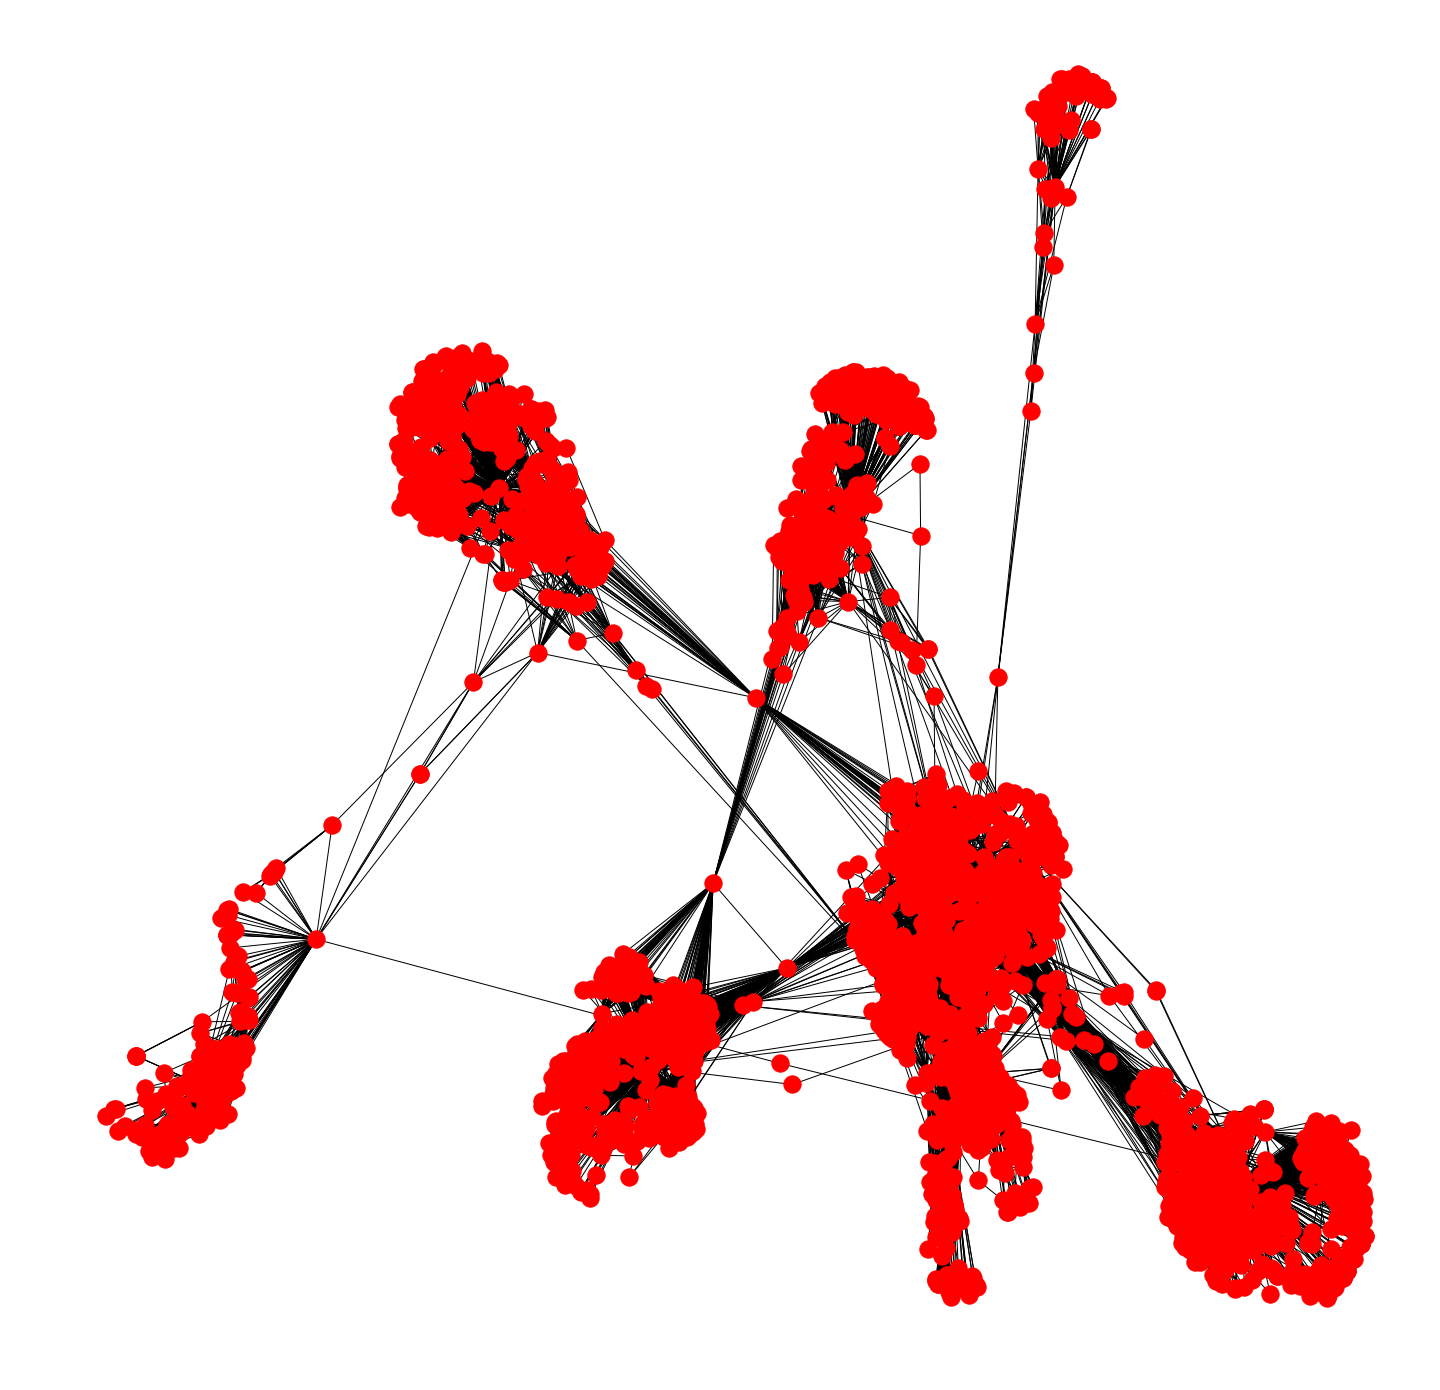

In [450]:
fig, ax = plt.subplots(figsize=(25,25))
nx.draw(G)

### Metodo de Monte Carlo para aproximar la distancia media

In [461]:
def sample_path_lengths(G, nodes=None, trials=1000):
    """Choose random pairs of nodes and compute the path length between them.

    G: Graph
    nodes: list of nodes to choose from
    trials: number of pairs to choose

    returns: list of path lengths
    """
    if nodes is None:
        nodes = list(G)
    else:
        nodes = list(nodes)
        
    pairs = np.random.choice(nodes, (trials, 2))
    lengths = [nx.shortest_path_length(G, *pair) 
               for pair in pairs]
    return lengths

In [462]:
def estimate_path_length(G, nodes=None, trials=1000):
    return np.mean(sample_path_lengths(G, nodes, trials))

In [463]:
C = average_clustering(G)
C

0.593

In [464]:
L = estimar_distancia_media(G)
print(L)

(3.7375, 1.1805057179022895)


In [465]:
print("NODES :",len(G.nodes()))
print("EDGES: ",len(G.edges()))
print("Convenxo: ")
print("Coeficiente de agrupamiento: ", nx.average_clustering(G))

dist_media, stdev = estimar_distancia_media(G)
print("Distancia media: ", dist_media)
print("Desviación estandar: ", stdev)

NODES : 4039
EDGES:  88234
Convenxo: 
Coeficiente de agrupamiento:  0.6055467186200876
Distancia media:  3.715
Desviación estandar:  1.1742125020625527


In [466]:
grados = G.degree()
print(" El promedio de amistades de una persona es : ",np.mean(list(dict(grados).values())))

 El promedio de amistades de una persona es :  43.69101262688784


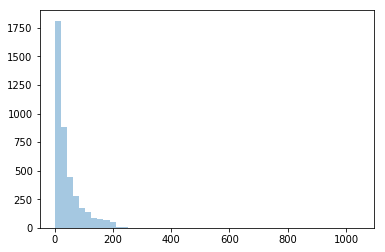

In [467]:
sns.distplot(list(dict(grados).values()), kde=False)

### Construccion de un grafo WS en base a las caracteristicas del conjunto de datos
- Para elegir el parametro k:

- k = $(aristas*2)/n$

In [468]:
k = int(round((len(G.edges())*2)/len(G.nodes())))
k

44

In [469]:
lattice = nx.watts_strogatz_graph(n, 44, 0)
print(" NODES :",len(lattice.nodes()))
print(" EDGES: ",len(lattice.edges()))
print(" Convenxo: ")
print(" Coeficiente de agrupamiento: ", nx.average_clustering(lattice))

dist_media = estimate_path_length(lattice)
print(" Distancia media: ", dist_media)

 NODES : 4039
 EDGES:  88858
 Convenxo: 
 Coeficiente de agrupamiento:  0.7325581395348406
 Distancia media:  46.669


- Para calcular la distribución de grado usamos Pmf

In [470]:
from empiricaldist import Pmf

In [471]:
def degrees(G):
    """List of degrees for nodes in `G`.
    
    G: Graph object
    
    returns: list of int
    """
    return [G.degree(u) for u in G]

- A `Pmf` object maps from each degree to the fraction of nodes with that degree.

In [472]:
pmf_fb = Pmf.from_seq(degrees(G))
pmf_fb.mean(), pmf_fb.std()

(43.69101262688785, 52.41411556737521)

In [473]:
pmf_ws = Pmf.from_seq(degrees(lattice))
pmf_ws.mean(), pmf_ws.std()

(44.0, 0.0)

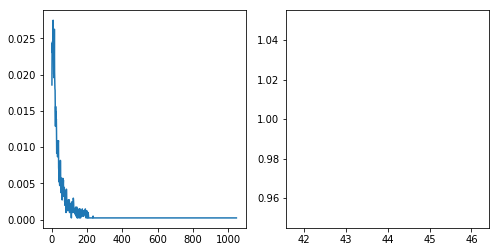

In [474]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
pmf_fb.plot(label='Facebook', color='C0')
#plt.xlabel='Degree', plt.ylabel='PMF'

plt.subplot(1,2,2)
pmf_ws.plot(label='WS graph', color='C1')
#xlabel='Degree'

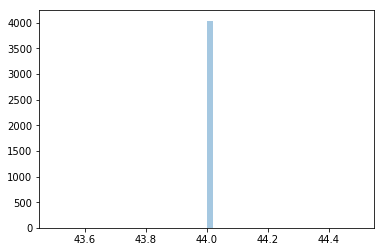

In [475]:
sns.distplot(list(dict(lattice.degree()).values()), kde=False)

In [476]:
random_graph = nx.watts_strogatz_graph(n, k, 1)

In [477]:
pmf_ws = Pmf.from_seq(degrees(random_graph))
pmf_ws.mean(), pmf_ws.std()

(44.0, 4.699222673599675)

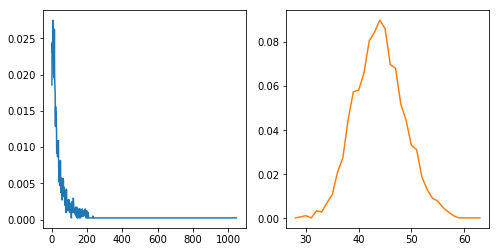

In [478]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
pmf_fb.plot(label='Facebook', color='C0')
#plt.xlabel='Degree', plt.ylabel='PMF'

plt.subplot(1,2,2)
pmf_ws.plot(label='WS graph', color='C1')
#xlabel='Degree'

### Por prueba y error se encuentra que cuando p = 0.5 tenemos un grafo WS

In [479]:
ws = nx.watts_strogatz_graph(n, k, 0.05, seed=15)

In [480]:
pmf_ws = Pmf.from_seq(degrees(ws))
pmf_ws.mean(), pmf_ws.std()

(44.00000000000001, 1.4309215628189869)

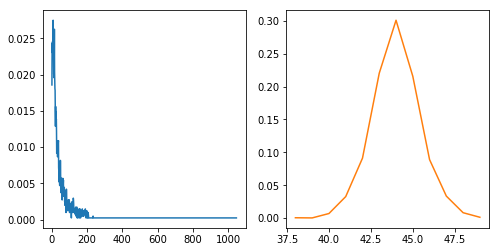

In [481]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
pmf_fb.plot(label='Facebook', color='C0')
#plt.xlabel='Degree', plt.ylabel='PMF'

plt.subplot(1,2,2)
pmf_ws.plot(label='WS graph', color='C1')
#xlabel='Degree'

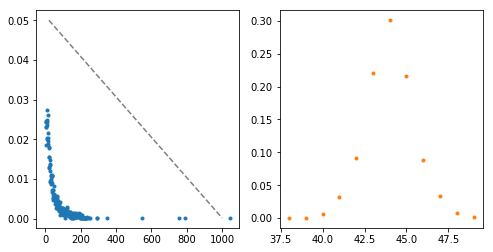

In [482]:
plt.figure(figsize=(8,4))
options = dict(ls='', marker='.')

plt.subplot(1,2,1)
plt.plot([20, 1000], [5e-2, 2e-4], color='gray', linestyle='dashed')

pmf_fb.plot(label='Facebook', color='C0', **options)

plt.subplot(1,2,2)
pmf_ws.plot(label='WS graph', color='C1', **options)

In [483]:
import thinkstats2 as thk

In [484]:
pmf_fb = thk.Pmf(degrees(G))
pmf_fb.Mean(), pmf_fb.Std()

(43.69101262688786, 52.41411556737523)

In [485]:
pmf_ws = thk.Pmf(degrees(ws))
pmf_ws.Mean(), pmf_ws.Std()

(44.000000000000014, 1.430921562818987)

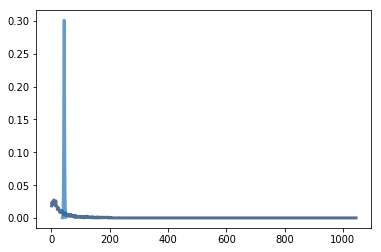

In [486]:
thk.thinkplot.Pdf(pmf_fb, label = "Facebook")
thk.thinkplot.Pdf(pmf_ws, label = "WS graph")

### Heavy tailed distributions
- Todas las distribuciones que siguen una ley de potencia son de este tipo pero no todas las que son de este tipo siguen una ley de potencia

### Barabási-Albert model

- Modelo propuesto para generar grafos que sigan una ley de potencia
    - Growth: En lugar de empezar con un número fijo de vertices, el modelo BA empieza con un small graph y agrega un vertice a la vez
    - Preferential attachment: Cuando una nueva arista es generada, es mas probable que se conecte a un vertice que tiene un mayor número de aristas.

In [487]:
def grafo_exponencial(n: int) -> nx.Graph():
    G = nx.empty_graph()
    for u in range(n):
        G.add_node(u)
        V, d = zip(*G.degree())
        d = np.array(d) + 1
        d = d/np.sum(d)
        
        for v,p in zip(V,d):
            if random.random() <= p:
                G.add_edge(u,v)
    cc = max(nx.connected_components(G), key=len)
    G.remove_nodes_from(set(G)-cc)
    return G

In [488]:
G_e = grafo_exponencial(len(G.nodes()))
print(" NODOES :",len(G_e.nodes()))
print(" EDGES: ",len(G_e.edges()))
print(" Convenxo: ")
print(" Coeficiente de agrupamiento: ", nx.average_clustering(G_e))

dist_media, stdev = estimar_distancia_media(G_e)
print(" Distancia media: ", dist_media)
print(" Desviación estandar: ", stdev)

 NODOES : 2758
 EDGES:  3945
 Convenxo: 
 Coeficiente de agrupamiento:  0.00152997749759538
 Distancia media:  6.2175
 Desviación estandar:  1.5149896864335415


In [489]:
def cumulative_prob(pmf, x):
    ps = [pmf[value] for value in pmf if value<=x]
    return np.sum(ps)

In [491]:
#La fraccion de usuarios con 25 o menos amigos
cumulative_prob(pmf_fb, 25)

0.5060658578856152

In [494]:
cdf_fb = thk.Cdf(degrees(G), label = "Facebook")
cdf_fb

Cdf([   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  119  120  121  122  123  124  125  126  127
  128  129  130  131  132  133  134  135  136  137  138  139  140  141
  142  144  145  146  147  148  149  150  151  152  153  154  155  156
  157  158  159  160  161  162  163  164  165  166  167  168  169  170
  171  172  173  174  175  176  177  178  179  180  181  182  183  184
  185  186  187  188  189  190  191  192  193  194  195  196  197  198
  

{'xscale': 'linear', 'yscale': 'linear'}

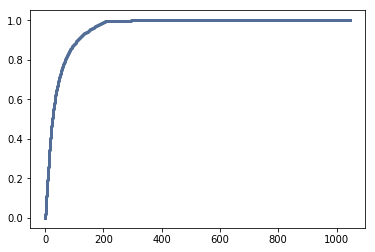

In [495]:
thk.thinkplot.Cdf(cdf_fb)

In [496]:
cdf_ws = thk.Cdf(degrees(ws), label = "WS")
cdf_ws

Cdf([38 39 40 41 42 43 44 45 46 47 48 49], [4.95172072e-04 7.42758108e-04 7.67516712e-03 4.03565239e-02
 1.31468185e-01 3.51819757e-01 6.52636791e-01 8.68284229e-01
 9.57167616e-01 9.90591731e-01 9.98762070e-01 1.00000000e+00], 'WS')

{'xscale': 'linear', 'yscale': 'linear'}

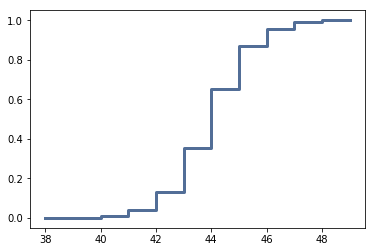

In [497]:
thk.thinkplot.Cdf(cdf_ws)

In [498]:
cdf_BA = thk.Cdf(degrees(G_e), label = "BA")
cdf_BA

Cdf([ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 27 30 33
 36 43 89], [0.35134155 0.6062364  0.7657723  0.84481508 0.89448876 0.92965917
 0.94742567 0.96047861 0.97280638 0.98078318 0.98477157 0.98839739
 0.99129804 0.99311095 0.99456128 0.99564902 0.9960116  0.99637418
 0.99673677 0.99709935 0.99782451 0.99818709 0.99854967 0.99891226
 0.99927484 0.99963742 1.        ], 'BA')

{'xscale': 'linear', 'yscale': 'linear'}

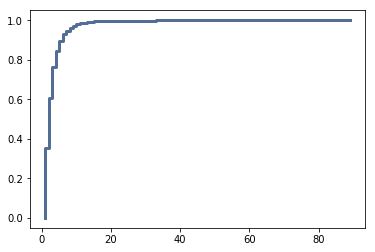

In [499]:
thk.thinkplot.Cdf(cdf_BA)

### Modelo explicativo
- En un sistema S vemos algo observable, o que garantiza una explicación
- Construimos un modelo M que es analogo al sistema; esto es, hay una correspondencia entre los elementos del modelo y los elementos del sistema..
- Mediante simulaciones o derivación matematica demostramos que este modelo exhibe una conducta, B es analogo a O
- Concluimos que S exhibe O ya que S es similar a M, M exhibe B y B es similar a O.